# Histogram

Hi and welcome to the class. Today we will make Histrograms.

In [13]:
# import required pacakges
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df = pd.read_csv('Data/df_weed.csv')
df.head()

,Date,State,HighQ,MedQ,LowQ
0,2014-01-01,Alabama,339.06,198.64,149.49
1,2014-01-01,Alaska,288.75,260.60,388.58
2,2014-01-01,Arizona,303.31,209.35,189.45
3,2014-01-01,Arkansas,361.85,185.62,125.87
4,2014-01-01,California,248.78,193.56,192.92


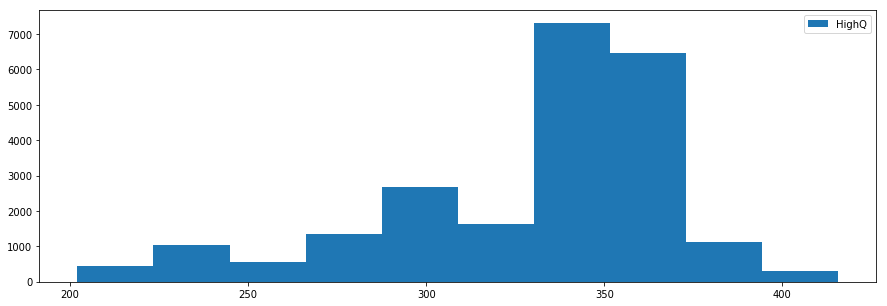

In [15]:
# instantiate a figure and axes
fig, ax = plt.subplots(figsize=(15,5))



# Histogram returns a tuple
# number of matching items for each bin
# bins and patches
n, bins, p = ax.hist('HighQ', data=df, label='HighQ') 
ax.legend()


Basically, all those patches reside in a barcontainer. So you can refer to each path or address all patches in a bar container. For example

In [16]:
ax.containers

[<Container object of 10 artists>]

It says, there is one container object comprising of 10 artists.

If you want to know available parameters in histogram, you can call the help function.

In [17]:
help(ax.hist)

Help on method hist in module matplotlib.axes._axes:

hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values,

You can also manually define bins by passing a list of numbers set a preferred number of bins if you like. You can also plot histograms straight from pandas. That's exactly what we will do now

Text(0.5,1,'Price distribution of weed')

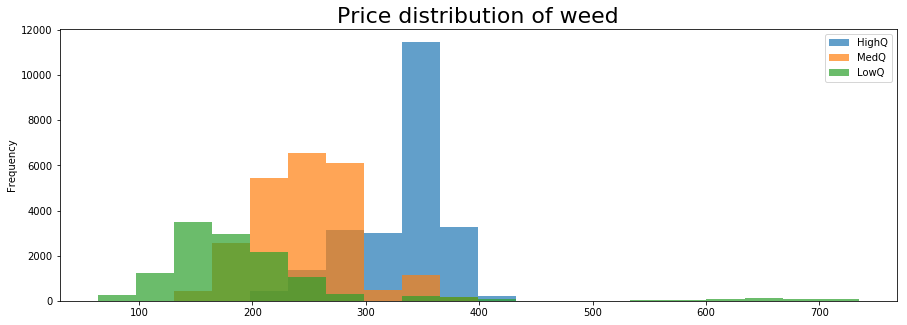

In [18]:
fig2, ax2=plt.subplots(figsize=(15,5))

# By default, if you don't specify a column or columns
# It makes a histogram of every column with numeric values.
# and returns axes
df.plot.hist(ax=ax2, alpha=0.7, bins=20)
ax2.set_title("Price distribution of weed", size=22)

Let's see if each column is organized in a separate BarContainer.

In [25]:
ax2.containers

[<Container object of 20 artists>,
 <Container object of 20 artists>,
 <Container object of 20 artists>]

In [28]:
'''
Let's single out the first BarContainer
'''
bc = ax2.containers[0]
# Let's see what label belongs to it
bc.patches[0].get_label()

'HighQ'

Alright, if you need to, say, change the color of HighQ barcontainer you can do the following

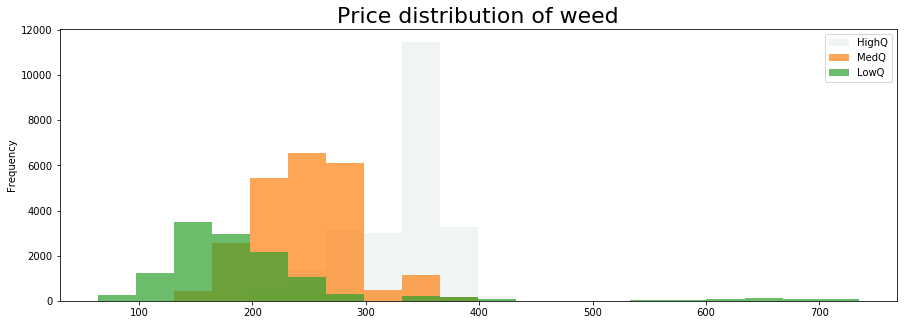

In [21]:
for p in bc.patches:
    p.set_facecolor('#ecf0f1')

# redraw the legend as we changed patch color
ax2.legend()
fig2

Let's make the labels in the legend more informative

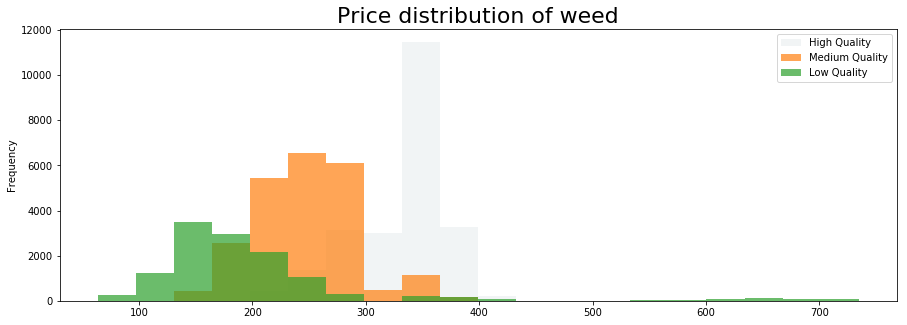

In [22]:
ax2.legend(labels=['High Quality','Medium Quality','Low Quality'])

fig2

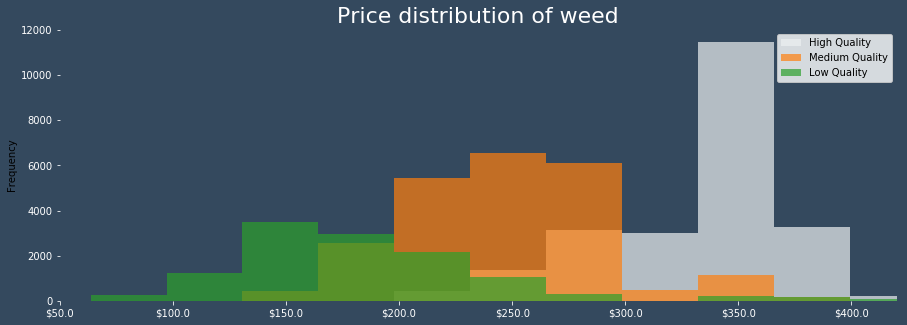

In [23]:
# Final cosmetic touches to it more appealing

# set figure color
fig2.set_facecolor('#34495e')

# set axes color
ax2.set_facecolor('#34495e')

# change tick color and tick labels to white
ax2.tick_params(colors='white')

# remove the spines
ax2.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)

# se title color to white
ax2.title.set_color('white')

# Let's limit the x to the most
# congested section and cut out the 
# sparse bins
ax2.set_xlim(50, 420)

# Let's add USD symbol to the x tick labels
from matplotlib.ticker import StrMethodFormatter
mft = StrMethodFormatter("${x}")
ax2.xaxis.set_major_formatter(mft)

fig2

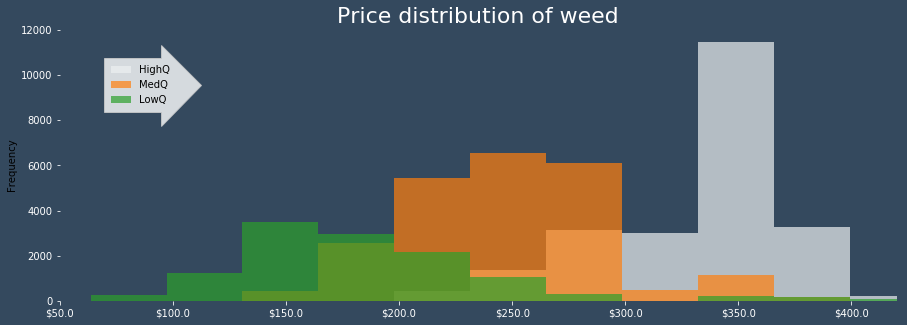

In [24]:
# Let's access the FancyBboxPatch 
# and set a boxstyle
ax2.legend(loc=2)
ax2.legend_.legendPatch.set_boxstyle('rarrow')
ax2.legend_.set_bbox_to_anchor([0.05, 0.9])

fig2

That is all about